<a href="https://colab.research.google.com/github/LulyaHaile/ds2003/blob/main/phase3_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [15]:
df = pd.read_csv("diabetes_dataset.csv")

num_cols = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'family_history_diabetes',
    'bmi',
    'systolic_bp',
    'heart_rate',
    'cholesterol_total',
    'glucose_fasting',
    'insulin_level',
    'diabetes_risk_score'
]

corr = df[num_cols].corr()["diabetes_risk_score"].drop("diabetes_risk_score")

In [16]:
groups = {
    "Lifestyle": [
        'alcohol_consumption_per_week',
        'physical_activity_minutes_per_week',
        'diet_score',
        'sleep_hours_per_day',
        'screen_time_hours_per_day',
    ],
    "Physiological": [
        'age',
        'bmi',
        'systolic_bp',
        'heart_rate',
    ],
    "Medical": [
        'family_history_diabetes',
        'cholesterol_total',
        'glucose_fasting',
        'insulin_level'
    ]
}

color_map = {
    "Lifestyle": "#1f77b4",
    "Physiological": "#d62728",
    "Medical": "#2ca02c"
}

predictors = {
    'age': 'Age',
    'alcohol_consumption_per_week': 'Alcohol',
    'physical_activity_minutes_per_week': 'Activity',
    'diet_score': 'Diet Score',
    'sleep_hours_per_day': 'Sleep',
    'screen_time_hours_per_day': 'Screen',
    'family_history_diabetes': 'History',
    'bmi': 'BMI',
    'systolic_bp': 'Systolic BP',
    'heart_rate': 'HR',
    'cholesterol_total': 'Cholesterol',
    'glucose_fasting': 'Glucose',
    'insulin_level': 'Insulin'
}

corr_df = pd.DataFrame({
    "Feature": corr.index,
    "Correlation": corr.values
})

corr_df["Group"] = corr_df["Feature"].apply(lambda x: next((g for g, lst in groups.items() if x in lst), "Other"))
fig = go.Figure()

for group, color in color_map.items():
    group_df = corr_df[corr_df["Group"] == group]
    fig.add_trace(go.Bar(
        x=[predictors[f] for f in group_df["Feature"]],
        y=group_df["Correlation"],
        marker_color=color,
        name=group,
        hovertemplate="<b>%{x}</b><br>Correlation: %{y:.2f}<extra></extra>"
    ))

fig.update_layout(
    title="The Effect of Predictors on Diabetes Risk Score",
    xaxis_title="Feature",
    yaxis_title="Correlation",
    xaxis_tickangle=0,
    height=600,
    barmode="group",
    showlegend=True
)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="All Groups", method="update", args=[{"visible": [True]*3}]),
                dict(label="Lifestyle", method="update", args=[{"visible": [True, False, False]}]),
                dict(label="Physiological", method="update", args=[{"visible": [False, True, False]}]),
                dict(label="Medical", method="update", args=[{"visible": [False, False, True]}]),
            ],
            direction="down",
            showactive=True
        )
    ]
)

fig.update_layout(
    xaxis=dict(dtick=1),
    height=600,
    title_font_size=22
)

fig.show()

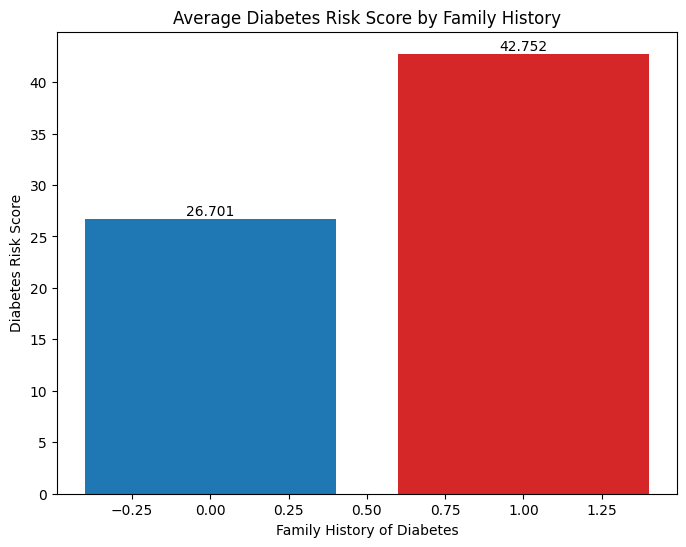

In [17]:
grouped = df.groupby("family_history_diabetes")["diabetes_risk_score"].mean().reset_index()
labels = grouped["family_history_diabetes"]
scores = grouped["diabetes_risk_score"]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, scores, color=['#1f77b4', '#d62728'])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

ax.set_title("Average Diabetes Risk Score by Family History")
ax.set_xlabel("Family History of Diabetes")
ax.set_ylabel("Diabetes Risk Score")

plt.show()

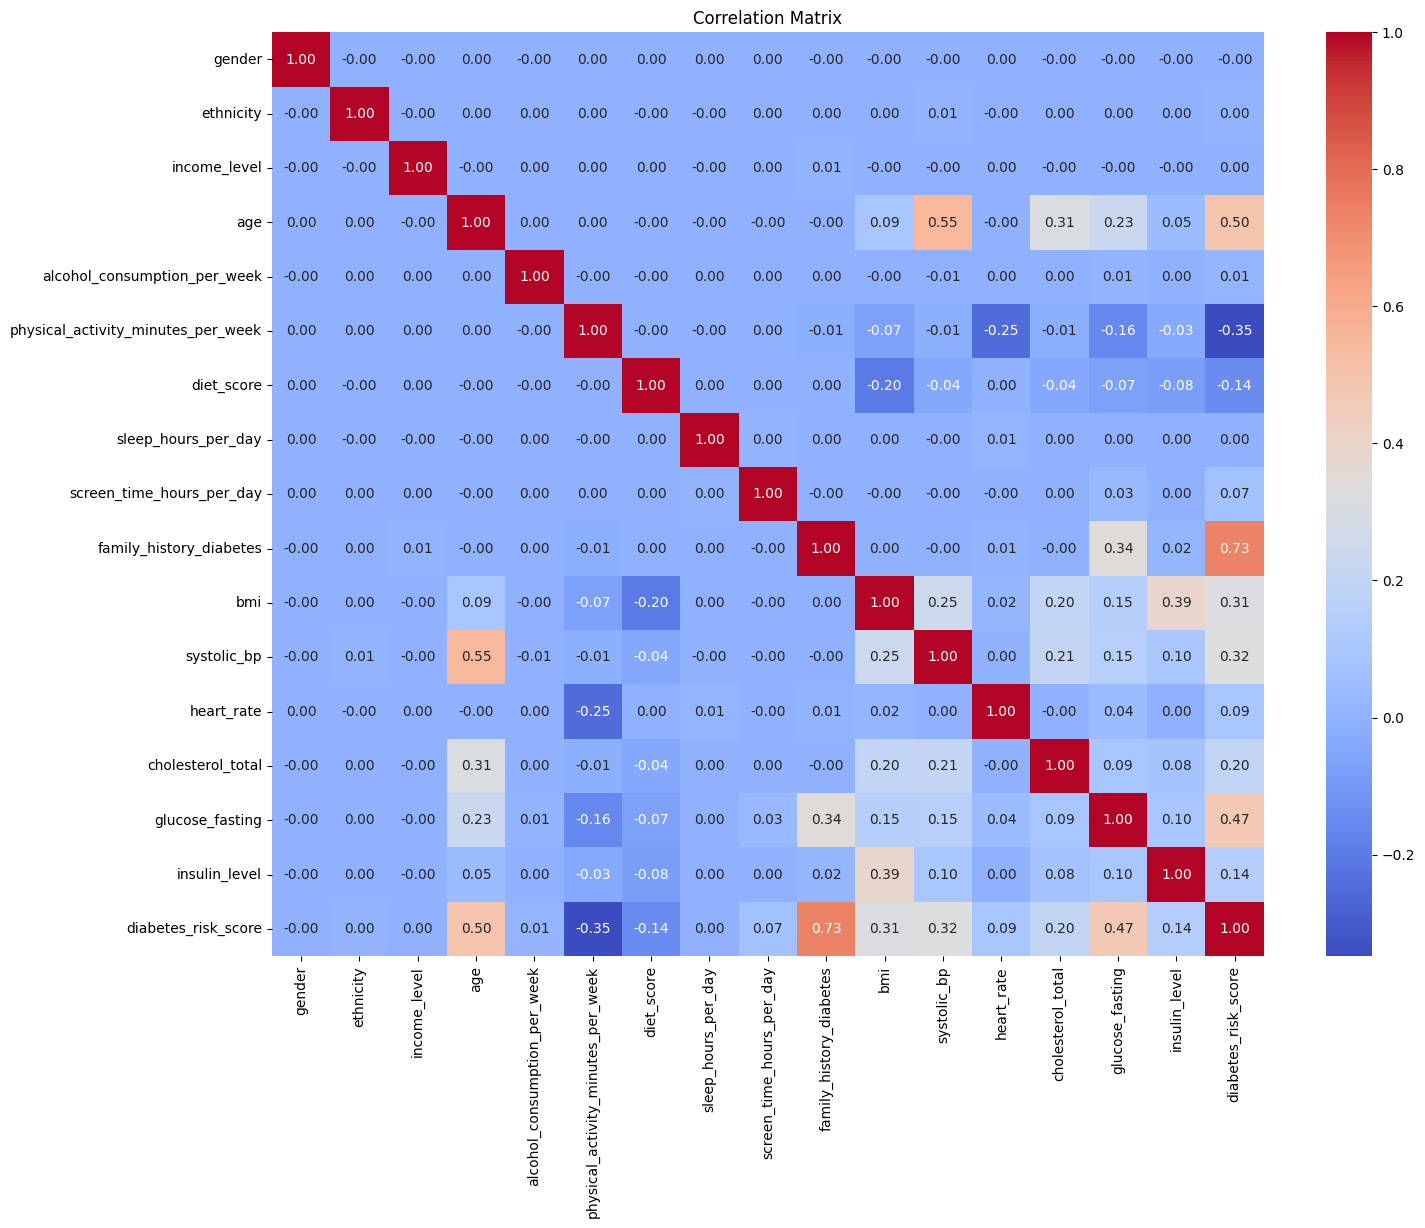

In [18]:
# categorical variables
df_encoded = df.copy()
categorical = ['gender', 'ethnicity', 'income_level']
for col in categorical:
  df_encoded[col] = df_encoded[col].astype("category").cat.codes

corr_cols = categorical + num_cols

#corr = df[num_cols].corr()
corr = df_encoded[corr_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()